# Figure 7

### Caution:
You need to run <code>python eeg_cleaning.py</code> and <code>python eeg_fc.py</code> (in that order) in a terminal prior to running this program. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import sem
import seaborn as sns
from statannotations.Annotator import Annotator
from sklearn.metrics import r2_score
from functions import make_directory, curve_fit_log

#plt.style.use('classic')
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'arial'

In [2]:
def load(level, is_ica):
    ica_flag = True if is_ica == '' else False
    output = []
    for i in range(29):
        s = str(i+1).zfill(2)
        for se in range(1, 4):
            for pair in range(6):
                p = f'EEG_SPI_results/{level}/pair_data/pair{pair}_sub{s}_se{se}{is_ica}.csv'
                res = np.loadtxt(p, delimiter=',')
                output.extend([[r[0], r[1], level, ica_flag] for r in res])

    print("done", level, is_ica)
    return output

data = load('easy', '')
data.extend(load('hard', ''))
data.extend(load('easy', '_noica'))
data.extend(load('hard', '_noica'))

done easy 
done hard 
done easy _noica
done hard _noica


In [3]:
x_label, y_label, hue, ica_flag = r'$\langle k \rangle$', '$ACC$', 'level', 'ICA used'
df = pd.DataFrame(data, columns = [x_label, y_label, hue, ica_flag]) 

C:\Users\Arya\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


(2, 6829913)
easy False $R^2 = 0.329$
(2, 6836285)
hard False $R^2 = 0.308$
(2, 6836409)
easy True $R^2 = 0.326$
(2, 6843713)
hard True $R^2 = 0.334$


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


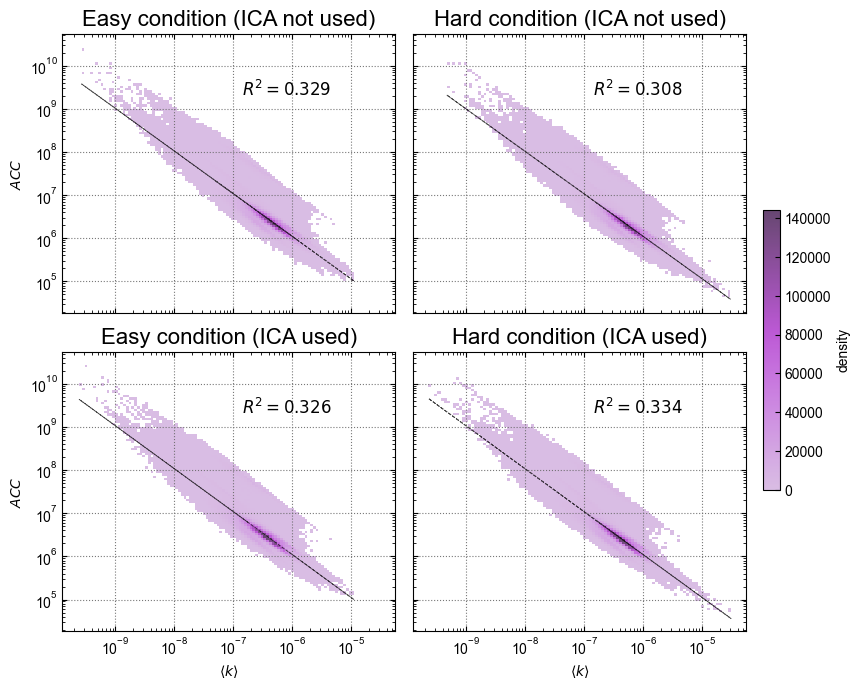

In [4]:
g = sns.FacetGrid(df, row=ica_flag, col=hue, despine=False, sharex=True, 
                  sharey=True, row_order=[False, True], aspect=1.2, 
                  height=3.5)
cax = g.fig.add_axes([.92, .3, .02, .4])
g.map(sns.histplot, x_label, y_label, log_scale=(True,True), cbar=True, cbar_ax=cax, 
      cbar_kws={'label': 'density'}, color='mediumorchid', bins=100)
g.tick_params(which='both', direction = 'in', right=True, top=True)
g.fig.subplots_adjust(right=.9)

for row in g.axes:
    for ax in row:
        title = ax.get_title()
        titles = ["Easy condition (ICA used)", "Easy condition (ICA not used)",
                  "Hard condition (ICA used)", "Hard condition (ICA not used)"]
    
        if "True" in title and "easy" in title:
            new_title = titles[0]
        elif "easy" in title:
            new_title = titles[1]
        elif "hard" in title and "True" in title:
            new_title = titles[2]
        else:
            new_title = titles[3]
        
        ax.set_title(new_title, fontsize=16)

levels, ica_used = ['easy', 'hard'], [False, True]
for i in range(len(ica_used)):
    for j in range(len(levels)):
        level, f = levels[j], ica_used[i]
        a = df.loc[(df['level'] == level) & (df['ICA used'] == f)].get([x_label,
                                                                        y_label]).to_numpy()
        a = a.transpose()
        print(a.shape)
        xs, y_true = a[0], a[1]
        popt_log, pcov_log, ydatafit_log = curve_fit_log(xs, y_true)
        
        g.axes[i][j].plot(xs, ydatafit_log, color='black', lw=0.65, alpha=0.7, ls='--')
        g.axes[i][j].grid(which='major', c='dimgrey', alpha=0.9, ls='dotted')
        score = round(r2_score(y_true, ydatafit_log), 3)
        g.axes[i][j].text(1e-7 + 4e-8, 10e8*2, f'$R^2 = {score:.3f}$', fontsize=12)
        print(level, f, f'$R^2 = {score}$')

path = 'Figure7'
make_directory(path)
g.savefig(f'{path}/Figure7.jpeg', dpi=500, bbox_inches='tight')
g.savefig(f'{path}/Figure7.pdf', bbox_inches='tight')
g.savefig(f'{path}/Figure7.eps', bbox_inches='tight')
plt.show()